MARKET PROJECT 




FIRST PART: CORRELATION ANALYSIS BETWEEN NVDA AND VIX

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import seaborn as sns

data = pd.read_excel('/Users/marapopescu/Desktop/Price.xlsx', sheet_name='VIX9D_History')

data = data.dropna(subset=['VIX', 'NVDA', 'T-Bill'])
data['VIX'] = pd.to_numeric(data['VIX'], errors='coerce')
data['NVDA'] = pd.to_numeric(data['NVDA'], errors='coerce')
data['T-Bill'] = pd.to_numeric(data['T-Bill'], errors='coerce')

VIX_r = np.log(data['VIX'] / data['VIX'].shift(-1))
NVDA_r = np.log(data['NVDA'] / data['NVDA'].shift(-1))
TBill_r = np.log(data['T-Bill'] / data['T-Bill'].shift(-1))
VIX_r = VIX_r.dropna()
NVDA_r = NVDA_r.dropna()
TBill_r = TBill_r.dropna()

print(VIX_r)
print(NVDA_r)
print(TBill_r)

print(f"Shape of VIX_r: {VIX_r.shape}")
print(f"Shape of NVDA_r: {NVDA_r.shape}")
print(f"Shape of TBill_r: {TBill_r.shape}")

0      -0.064039
1       0.036090
2      -0.050303
3      -0.133195
4      -0.131028
          ...   
999     0.055467
1000   -0.048247
1001    0.249763
1002   -0.127116
1003   -0.033941
Name: VIX, Length: 1004, dtype: float64
0       0.050775
1       0.016914
2      -0.028811
3      -0.037435
4       0.007651
          ...   
999    -0.019165
1000    0.032420
1001    0.034522
1002   -0.012229
1003    0.060508
Name: NVDA, Length: 1004, dtype: float64
0       0.000000
1       0.004717
2      -0.002361
3      -0.002356
4      -0.002350
          ...   
999     0.223144
1000    0.000000
1001    0.693147
1002    2.995732
1003    0.000000
Name: T-Bill, Length: 1004, dtype: float64
Shape of VIX_r: (1004,)
Shape of NVDA_r: (1004,)
Shape of TBill_r: (1004,)


Data Check

Covariance Matrix VIX and NVDA returns:
[[0.01493957 0.0002351 ]
 [0.0002351  0.00113622]]
Covariance Matrix r and NVDA returns:
[[ 0.00113622 -0.00021155]
 [-0.00021155  0.1078795 ]]
Covariance Matrix VIX and r returns:
[[0.01493957 0.00019709]
 [0.00019709 0.1078795 ]]
Correlation (rho) between VIX and NVDA returns:
[[1.         0.05706299]
 [0.05706299 1.        ]]


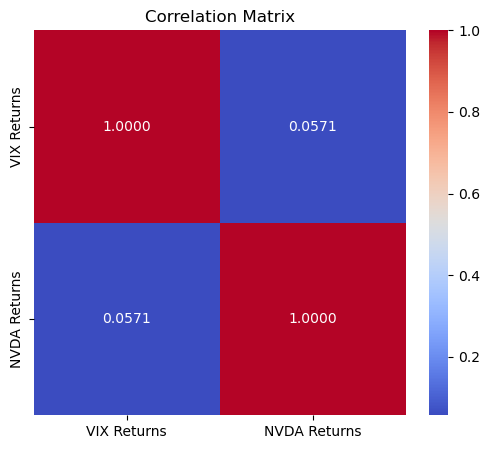

Correlation (rho) between r and NVDA returns:
[[ 1.         -0.01910783]
 [-0.01910783  1.        ]]


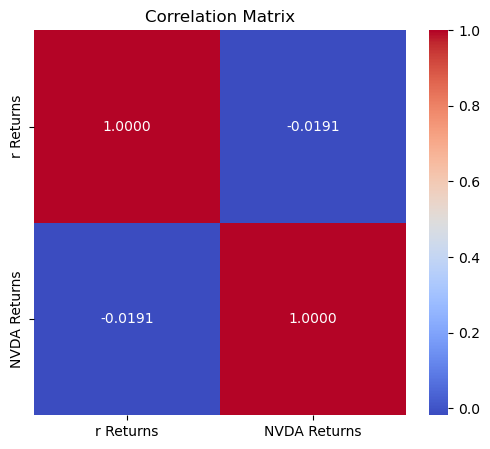

Correlation (rho) between r and VIX returns:
[[1.         0.00490937]
 [0.00490937 1.        ]]


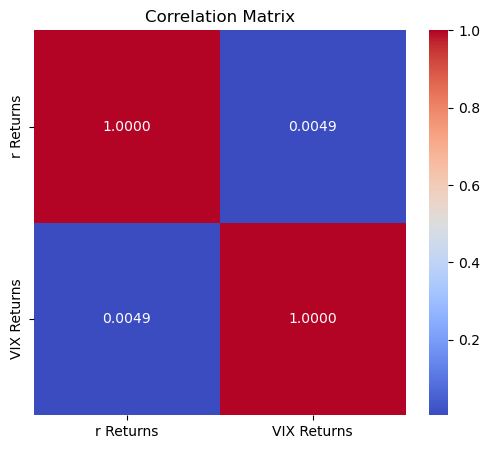

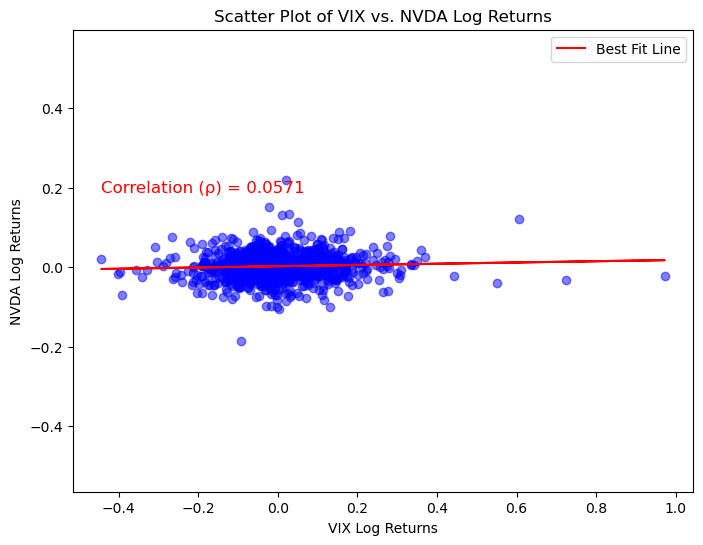

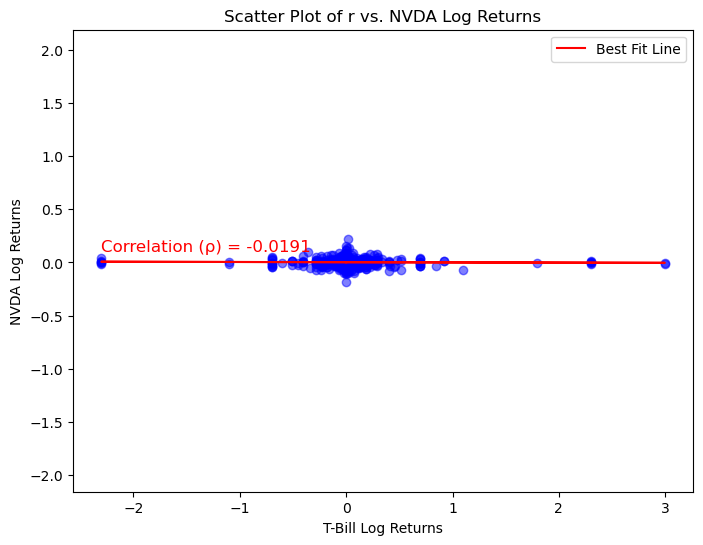

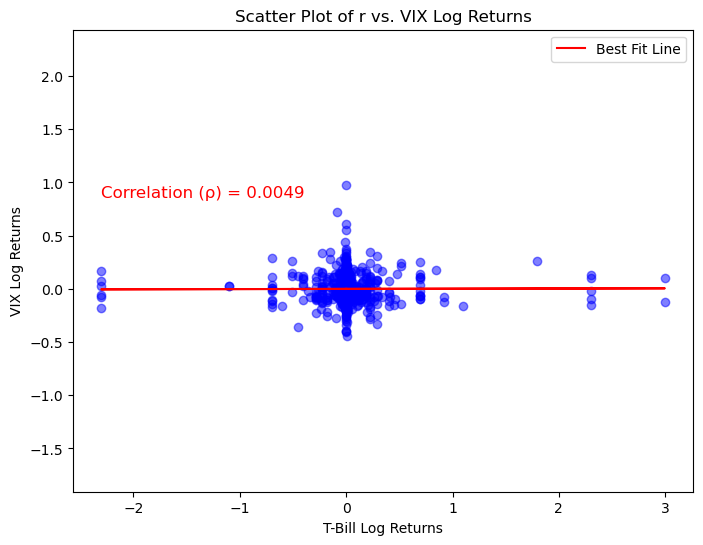

In [2]:
cov_VIX_NVDA = np.cov(VIX_r, NVDA_r)
cov_VIX_r = np.cov(VIX_r, TBill_r)
cov_NVDA_r= np.cov(NVDA_r, TBill_r)
rho_Vix_NVDA = np.corrcoef(VIX_r, NVDA_r)
rho_r_NVDA = np.corrcoef(TBill_r, NVDA_r)
rho_Vix_r = np.corrcoef(VIX_r, TBill_r)

print("Covariance Matrix VIX and NVDA returns:")
print(cov_VIX_NVDA)
print("Covariance Matrix r and NVDA returns:")
print(cov_NVDA_r)
print("Covariance Matrix VIX and r returns:")
print(cov_VIX_r)

print(f"Correlation (rho) between VIX and NVDA returns:\n{rho_Vix_NVDA}")
plt.figure(figsize=(6, 5))
sns.heatmap(rho_Vix_NVDA, annot=True, cmap='coolwarm', fmt='.4f', cbar=True, xticklabels=['VIX Returns', 'NVDA Returns'], yticklabels=['VIX Returns', 'NVDA Returns'])
plt.title('Correlation Matrix')
plt.show()

print(f"Correlation (rho) between r and NVDA returns:\n{rho_r_NVDA}")
plt.figure(figsize=(6, 5))
sns.heatmap(rho_r_NVDA, annot=True, cmap='coolwarm', fmt='.4f', cbar=True, xticklabels=['r Returns', 'NVDA Returns'], yticklabels=['r Returns', 'NVDA Returns'])
plt.title('Correlation Matrix')
plt.show()

print(f"Correlation (rho) between r and VIX returns:\n{rho_Vix_r}")
plt.figure(figsize=(6, 5))
sns.heatmap(rho_Vix_r, annot=True, cmap='coolwarm', fmt='.4f', cbar=True, xticklabels=['r Returns', 'VIX Returns'], yticklabels=['r Returns', 'VIX Returns'])
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(VIX_r, NVDA_r, color='blue', alpha=0.5)
plt.title('Scatter Plot of VIX vs. NVDA Log Returns')
plt.xlabel('VIX Log Returns')
plt.ylabel('NVDA Log Returns')
slope, intercept = np.polyfit(VIX_r, NVDA_r, 1) #line fit
plt.plot(VIX_r, slope * VIX_r + intercept, color='red', label='Best Fit Line')

plt.xlim([min(VIX_r), max(VIX_r)])
plt.ylim([min(NVDA_r), max(NVDA_r)])
plt.axis('equal')
plt.title('Scatter Plot of VIX vs. NVDA Log Returns')
plt.xlabel('VIX Log Returns')
plt.ylabel('NVDA Log Returns')


plt.text(min(VIX_r), max(NVDA_r), f'Correlation (ρ) = {rho_Vix_NVDA[0, 1]:.4f}', fontsize=12, color='red',  ha='left', va='top')

plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(TBill_r, NVDA_r, color='blue', alpha=0.5)
plt.title('Scatter Plot of NVDA vs. r Log Returns')
plt.xlabel('r Log Returns')
plt.ylabel('NVDA Log Returns')
slope, intercept = np.polyfit(TBill_r, NVDA_r, 1) #line fit
plt.plot(TBill_r, slope * TBill_r + intercept, color='red', label='Best Fit Line')

plt.xlim([min(TBill_r), max(TBill_r)])
plt.ylim([min(NVDA_r), max(NVDA_r)])
plt.axis('equal')
plt.title('Scatter Plot of r vs. NVDA Log Returns')
plt.xlabel('T-Bill Log Returns')
plt.ylabel('NVDA Log Returns')


plt.text(min(TBill_r), max(NVDA_r), f'Correlation (ρ) = {rho_r_NVDA[0, 1]:.4f}', fontsize=12, color='red',  ha='left', va='top')

plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(TBill_r, VIX_r, color='blue', alpha=0.5)
plt.title('Scatter Plot of VIX vs. r Log Returns')
plt.xlabel('r Log Returns')
plt.ylabel('VIX Log Returns')
slope, intercept = np.polyfit(TBill_r, VIX_r, 1) #line fit
plt.plot(TBill_r, slope * TBill_r + intercept, color='red', label='Best Fit Line')

plt.xlim([min(TBill_r), max(TBill_r)])
plt.ylim([min(VIX_r), max(VIX_r)])
plt.axis('equal')
plt.title('Scatter Plot of r vs. VIX Log Returns')
plt.xlabel('T-Bill Log Returns')
plt.ylabel('VIX Log Returns')


plt.text(min(TBill_r), max(VIX_r), f'Correlation (ρ) = {rho_Vix_r[0, 1]:.4f}', fontsize=12, color='red',  ha='left', va='top')

plt.legend()
plt.show()

Correlations: VIX and NVDA; VIX and r; r and NVDA

SECOND PART: CONSISTENT COMPUTATION OF IMPLIED VOLATILITIES FROM THE MARKET. A separate sheet is provided.

THIRD PART: COSTRUCTION OF THE TRADING STRATEGY (PRICING AND HEDGHING)

In [3]:
def callBarrierDownIn(S0, K, sigma, r, T, q, H , B):
    l =(r-q+sigma**2/2)/sigma**2
    y=(np.log(B**2/(S0*K)))/(sigma*np.sqrt(T)) + l*sigma*np.sqrt(T)
    cdi = S0*np.exp(-q*T)*((B/S0)**(2*l))*norm.cdf(y)-K*np.exp(-r*T)*((B/S0)**(2*l-2))*norm.cdf(y-sigma*np.sqrt(T))
    x1=(np.log(S0/H))/(sigma*np.sqrt(T))+sigma*np.sqrt(T)
    y1=(np.log(H/S0))/(sigma*np.sqrt(T))+l*sigma*np.sqrt(T)
    z =(np.log(H**2/(S0*K)))/(sigma*np.sqrt(T)) + l*sigma*np.sqrt(T)
    cui= S0*norm.cdf((x1))*np.exp(-q*T)-K*np.exp(-r*T)*norm.cdf(x1-sigma*np.sqrt(T))-S0*np.exp(-q*T)*((H/S0)**(2*l))*(norm.cdf(-z)-norm.cdf(-y1))+K*np.exp(-r*T)*((H/S0)**(2*l-2))*(norm.cdf(-z+sigma*np.sqrt(T))-norm.cdf(-y1+sigma*np.sqrt(T)))
    return (cdi+cui)/2
def Vega(S0, K, sigma, r, T, q, H , B, epsilon):
    return (callBarrierDownIn(S0, K, sigma+epsilon, r, T, q, H, B)-callBarrierDownIn(S0, K, sigma-epsilon, r, T, q, H , B))/(2*epsilon)

def Delta (S0, K, sigma, r, T, q, H , B, epsilon):
    return (callBarrierDownIn(S0+epsilon, K, sigma, r, T, q, H, B) - callBarrierDownIn(S0-epsilon, K, sigma, r, T, q, H, B)) / (2 * epsilon)

def Gamma (S0, K, sigma, r, T, q, H , B, epsilon):
    return (Delta(S0+epsilon, K, sigma, r, T, q, H, B, epsilon)-Delta(S0-epsilon, K, sigma, r, T, q, H, B, epsilon))/(2*epsilon)

def Rho(S0, K, sigma, r, T, q, H , B, epsilon):
    return (callBarrierDownIn(S0, K, sigma, r+epsilon, T, q, H, B) - callBarrierDownIn(S0, K, sigma, r+epsilon, T,q, H, B)) / (2 * epsilon)

def Theta(S0, K, sigma, r, T, q, H , B, epsilon):
    return (callBarrierDownIn(S0, K, sigma, r, T+epsilon, q, H, B) - callBarrierDownIn(S0, K, sigma, r, T+epsilon,q, H, B)) / (2 * epsilon)

epsilon = 0.0001



Starting

In [4]:
#Implied volatilities: lt strands for T=72/252 (long term), while st for T=22/252 (short term)

#Strangle lt1
IV_Call_lt1= 0.6278765087976224 #K=126
IV_Put_lt1= 0.5320751446726355 #K=116

#Strangle lt2
IV_Call_lt2= 0.7603792118670482 #K=125
IV_Put_lt2= 0.37183366860668726 #K=115

#Strangle st1
IV_Call_st1= 0.6599378539698191 #K=124
IV_Put_st1= 0.662678422460885 #K=114

#Strangle st2
IV_Call_st2= 0.6278765087976224 #K=122
IV_Put_st2= 0.5320751446726355 #K=112

#Strangle st3
IV_Call_st3= 1.0202268878369434 #K=125
IV_Put_st3= 0.3588617126936721 #K=115

#Barriers lt1
IV_Barrier_lt1= 0.7912623005230844 #K=121

#Barrier lt2
IV_Barrier_lt2= 0.7912623005230844 #K=120

#Barrier st1
IV_Barrier_st1= 1.1035984252304836 #K=119

#Barrier st2
IV_Barrier_st2= 1.0949441548638223 #K=120

#Barrier st3
IV_Barrier_st3= 1.2178922276162314 #K=120


Implied volatilites for Strangles and Barriers computed in the file "Implied volatilities computation"

In [5]:
#Barrier lt1

S0  = 118.65
K_Call_bar_lt1= 121
IV_Barrier_lt1= 0.7912623005230844 
r = 0.0522
T_lt=72/252
q=0
H_lt1= 139.5799
B_lt1= 104.9


#Selling 5 
Greeks_Bar_lt1=[(),(),(),(),()]
BarrierPrice_lt1 = callBarrierDownIn(S0, K_Call_bar_lt1, IV_Barrier_lt1, r, T_lt, q, H_lt1, B_lt1)
Greeks_Bar_lt1[0]=-Delta (S0, K_Call_bar_lt1, IV_Barrier_lt1, r, T_lt, q, H_lt1, B_lt1, epsilon)*1
Greeks_Bar_lt1[1]=-Gamma (S0, K_Call_bar_lt1, IV_Barrier_lt1, r, T_lt, q, H_lt1, B_lt1, epsilon)*1
Greeks_Bar_lt1 [2]=-Vega (S0, K_Call_bar_lt1, IV_Barrier_lt1, r, T_lt, q, H_lt1, B_lt1, epsilon)*1
Greeks_Bar_lt1[3]=-Theta (S0, K_Call_bar_lt1, IV_Barrier_lt1, r, T_lt, q, H_lt1, B_lt1, epsilon)*1
Greeks_Bar_lt1[4]=-Rho (S0, K_Call_bar_lt1, IV_Barrier_lt1, r, T_lt, q, H_lt1, B_lt1, epsilon)*1
print('Barrier1 lt', BarrierPrice_lt1)
print('Greeks Barrier 1 lt:', Greeks_Bar_lt1)

Barrier1 lt 14.341096178093526
Greeks Barrier 1 lt: [-0.1725586224754494, -0.007370948296170354, -23.2884686608692, -0.0, -0.0]


Barrier 1 lt: Computation of the price and Greeks (selling 5 contracts)


In [6]:
#Barrier lt2

S0  = 118.65
K_Call_bar_lt2= 120
IV_Barrier_lt2= 0.7912623005230844
r = 0.0522
T_lt=72/252
q=0
H_lt2= 142.299
B_lt2= 108.2501


#Selling 5 otc 
Greeks_Bar_lt2=[(),(),(),(),()]
BarrierPrice_lt2 = callBarrierDownIn(S0, K_Call_bar_lt2, IV_Barrier_lt2, r, T_lt, q, H_lt2, B_lt2)
Greeks_Bar_lt2[0]=-Delta (S0, K_Call_bar_lt2, IV_Barrier_lt2, r, T_lt, q, H_lt2, B_lt2, epsilon)*1
Greeks_Bar_lt2[1]=-Gamma (S0, K_Call_bar_lt2, IV_Barrier_lt2, r, T_lt, q, H_lt2, B_lt2, epsilon)*1
Greeks_Bar_lt2 [2]=-Vega (S0, K_Call_bar_lt2, IV_Barrier_lt2, r, T_lt, q, H_lt2, B_lt2, epsilon)*1
Greeks_Bar_lt2[3]=-Theta (S0, K_Call_bar_lt2, IV_Barrier_lt2, r, T_lt, q, H_lt2, B_lt2, epsilon)*1
Greeks_Bar_lt2[4]=-Rho (S0, K_Call_bar_lt2, IV_Barrier_lt2, r, T_lt, q, H_lt2, B_lt2, epsilon)*1
print('Barrier2 lt', BarrierPrice_lt2)
print('Greeks Barrier 2 lt:', Greeks_Bar_lt2)

Barrier2 lt 15.871423090615504
Greeks Barrier 2 lt: [-0.15317853200969012, -0.007735723173141196, -24.50368046387652, -0.0, -0.0]


Barrier 2 lt: Computation of the price and Greeks (selling 5 contracts)

In [7]:
#Barrier 1 st
S0  = 118.65
K_Call_bar_st1= 119
IV_Barrier_st1= 1.1035984252304836
r = 0.0522
T_st=22/252
q=0
H_st1= 131.199
B_st1= 107.3001


#Selling 5 otc 
Greeks_Bar_st1=[(),(),(),(),()]
BarrierPrice_st1 = callBarrierDownIn(S0, K_Call_bar_st1, IV_Barrier_st1, r, T_st, q, H_st1, B_st1)
Greeks_Bar_st1[0]=-Delta (S0, K_Call_bar_st1, IV_Barrier_st1, r, T_st, q, H_st1, B_st1, epsilon)*1
Greeks_Bar_st1[1]=-Gamma (S0, K_Call_bar_st1, IV_Barrier_st1, r, T_st, q, H_st1, B_st1, epsilon)*1
Greeks_Bar_st1 [2]=-Vega (S0, K_Call_bar_st1, IV_Barrier_st1, r, T_st, q, H_st1, B_st1, epsilon)*1
Greeks_Bar_st1[3]=-Theta (S0, K_Call_bar_st1, IV_Barrier_st1, r, T_st, q, H_st1, B_st1, epsilon)*1
Greeks_Bar_st1[4]=-Rho (S0, K_Call_bar_st1, IV_Barrier_st1, r, T_st, q, H_st1, B_st1, epsilon)*1
print('Barrier1 st', BarrierPrice_st1)
print('Greeks Barrier 1 st:', Greeks_Bar_st1)

Barrier1 st 11.101615088181633
Greeks Barrier 1 st: [-0.1650348470771945, -0.009333156469892856, -12.780902125770766, -0.0, -0.0]


Barrier 1 st: Computation of the price and Greeks  (selling 5 contracts) 


In [8]:
#Barrier 2 st
S0  = 118.65
K_Call_bar_st2= 119
IV_Barrier_st2= 1.1035984252304836
r = 0.0522
T_st=22/252
q=0
H_st2= 135.65
B_st2= 109.5001


#Selling 5 otc 
Greeks_Bar_st2=[(),(),(),(),()]
BarrierPrice_st2 = callBarrierDownIn(S0, K_Call_bar_st2, IV_Barrier_st2, r, T_st, q, H_st2, B_st2)
Greeks_Bar_st2[0]=-Delta (S0, K_Call_bar_st2, IV_Barrier_st2, r, T_st, q, H_st2, B_st2, epsilon)*1
Greeks_Bar_st2[1]=-Gamma (S0, K_Call_bar_st2, IV_Barrier_st2, r, T_st, q, H_st2, B_st2, epsilon)*1
Greeks_Bar_st2 [2]=-Vega (S0, K_Call_bar_st2, IV_Barrier_st2, r, T_st, q, H_st2, B_st2, epsilon)*1
Greeks_Bar_st2[3]=-Theta (S0, K_Call_bar_st2, IV_Barrier_st2, r, T_st, q, H_st2, B_st2, epsilon)*1
Greeks_Bar_st2[4]=-Rho (S0, K_Call_bar_st2, IV_Barrier_st2, r, T_st, q, H_st2, B_st2, epsilon)*1
print('Barrier2 st', BarrierPrice_st2)
print('Greeks Barrier 2 st:', Greeks_Bar_st2)

Barrier2 st 11.862579457355459
Greeks Barrier 2 st: [-0.1495245403138057, -0.009689227198350636, -13.438088982944407, -0.0, -0.0]


Barrier 2 st: Computation of the price and Greeks (selling 5 contracts) 

In [9]:
#Barrier 3 st
S0  = 118.65
K_Call_bar_st3= 120
IV_Barrier_st3= 1.2178922276162314
r = 0.0522
T_st=22/252
q=0
H_st3= 136.8499
B_st3= 111.880


#Selling 5 otc
Greeks_Bar_st3=[(),(),(),(),()]
BarrierPrice_st3 = callBarrierDownIn(S0, K_Call_bar_st3, IV_Barrier_st3, r, T_st, q, H_st3, B_st3)
Greeks_Bar_st3[0]=-Delta (S0, K_Call_bar_st3, IV_Barrier_st3, r, T_st, q, H_st3, B_st3, epsilon)*1
Greeks_Bar_st3[1]=-Gamma (S0, K_Call_bar_st3, IV_Barrier_st3, r, T_st, q, H_st3, B_st3, epsilon)*1
Greeks_Bar_st3 [2]=-Vega (S0, K_Call_bar_st3, IV_Barrier_st3, r, T_st, q, H_st3, B_st3, epsilon)*1
Greeks_Bar_st3[3]=-Theta (S0, K_Call_bar_st3, IV_Barrier_st3, r, T_st, q, H_st3, B_st3, epsilon)*1
Greeks_Bar_st3[4]=-Rho (S0, K_Call_bar_st3, IV_Barrier_st3, r, T_st, q, H_st3, B_st3, epsilon)*1
print('Barrier3 st', BarrierPrice_st3)
print('Greeks Barrier 3 st:', Greeks_Bar_st3)

Barrier3 st 13.91796007525637
Greeks Barrier 3 st: [-0.12610086962183686, -0.00903770391857961, -13.721683963456854, -0.0, -0.0]


Barrier 3 st: Computation of the price and Greeks

In [10]:
def BSCallOption(S, T, K, r, q, IV1Call):
    d1 = (np.log(S/K) + (r -q + 0.5 * IV1Call**2) * T) / (IV1Call * np.sqrt(T))
    d2 = d1 - IV1Call * np.sqrt(T)
    call_price = -K * np.exp(-r * T) * norm.cdf(d2) + S * np.exp(-q*T)* norm.cdf(d1)
    return call_price
def BSPutOption(S, T, K, r, q, IV1Put):
    d1 = (np.log(S/K) + (r -q + 0.5 * IV1Put**2) * T) / (IV1Put * np.sqrt(T))
    d2 = d1 - IV1Put * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2)- S * np.exp(-q*T)* norm.cdf(-d1)
    return put_price
def Strangle(S0, T1, Kcall, r, q, IV1Call,IV1Put, Kput):
    return BSCallOption(S0, T1, Kcall, r, q, IV1Call)+BSPutOption(S0, T1, Kput, r, q, IV1Put)
def Vega_str(S0, T1, Kcall, r, q, IV1Call,IV1Put, Kput, epsilon) :
    return (Strangle(S0, T1, Kcall, r, q, IV1Call+epsilon,IV1Put + epsilon, Kput)-Strangle(S0, T1, Kcall, r, q, IV1Call-epsilon,IV1Put-epsilon, Kput))/(2*epsilon)
def Delta_str(S0, T1, Kcall, r, q, IV1Call,IV1Put, Kput, epsilon):
    return (Strangle(S0 + epsilon, T1, Kcall, r, q, IV1Call,IV1Put, Kput)-Strangle(S0-epsilon, T1, Kcall, r, q, IV1Call,IV1Put, Kput))/(2*epsilon)
def Gamma_str(S0, T1, Kcall, r, q, IV1Call,IV1Put, Kput, epsilon):
    return (Delta_str(S0+epsilon, T1, Kcall, r, q, IV1Call,IV1Put, Kput, epsilon)-Delta_str(S0-epsilon, T1, Kcall, r, q, IV1Call,IV1Put, Kput, epsilon))/(2*epsilon)
def Theta_str(S0, T1, Kcall, r, q, IV1Call,IV1Put, Kput, epsilon):
    return (Strangle(S0, T1+epsilon, Kcall, r, q, IV1Call,IV1Put, Kput)-Strangle(S0, T1-epsilon, Kcall, r, q, IV1Call,IV1Put, Kput))/(2*epsilon)
def Rho_str(S0, T1, Kcall, r, q, IV1Call,IV1Put, Kput, epsilon):
    return (Strangle(S0, T1, Kcall, r+epsilon, q, IV1Call,IV1Put, Kput)-Strangle(S0, T1, Kcall, r-epsilon, q, IV1Call,IV1Put, Kput))/(2*epsilon)


Strangles functions

In [11]:
# Strangle 1 lt

S0  = 118.65
Call_lt1= 13.58
Put_lt1= 11.1
T=72/252
K_call_lt1=126
K_put_lt1=116
IVCall_lt1= 0.6278765087976224
IVPut_lt1= 0.5320751446726355
q=0

sigma0=0.2 #Initial Guess for minimize

Strangle_lt1= Strangle(S0, T, K_call_lt1, r, q, IVCall_lt1,IVPut_lt1, K_put_lt1)
Greeks_str_lt1=[(),(),(),(),()]
Greeks_str_lt1[0]=Delta_str(S0, T, K_call_lt1, r, q, IVCall_lt1,IVPut_lt1, K_put_lt1, epsilon)*1
Greeks_str_lt1[1]=Gamma_str(S0, T, K_call_lt1, r, q, IVCall_lt1,IVPut_lt1, K_put_lt1, epsilon)*1
Greeks_str_lt1[2]=Vega_str(S0, T, K_call_lt1, r, q, IVCall_lt1,IVPut_lt1, K_put_lt1,epsilon)*1
Greeks_str_lt1[3]=Theta_str(S0, T, K_call_lt1, r, q, IVCall_lt1,IVPut_lt1, K_put_lt1, epsilon)*1
Greeks_str_lt1[4]=Rho_str(S0, T, K_call_lt1, r, q, IVCall_lt1,IVPut_lt1, K_put_lt1, epsilon)*1
print('Strangle lt1:',Strangle_lt1)
print('Greeks strangle lt1:', Greeks_str_lt1)

Strangle lt1: 24.679999942533556
Greeks strangle lt1: [0.12120858698949633, 0.021399770844254817, 49.65621946674048, 49.938385291135035, -2.942457473231741]


Strangle lt1: Price and Greeks

In [12]:
#Strangle 2 lt

S0  = 118.65
Call_lt2= 17.3
Put_lt2= 6.75
T=72/252
K_call_lt2=125
K_put_lt2=115
IVCall_lt2 = 0.7603792118670482
IVPut_lt2  = 0.37183366860668726
q=0

Strangle_lt2= Strangle(S0, T, K_call_lt2, r, q, IVCall_lt2,IVPut_lt2, K_put_lt2)
Greeks_str_lt2=[(),(),(),(),()]
Greeks_str_lt2[0]=Delta_str(S0, T, K_call_lt2, r, q, IVCall_lt2,IVPut_lt2, K_put_lt2, epsilon)*1
Greeks_str_lt2[1]=Gamma_str(S0, T, K_call_lt2, r, q, IVCall_lt2,IVPut_lt2, K_put_lt2, epsilon)*1
Greeks_str_lt2[2]=Vega_str(S0, T, K_call_lt2, r, q, IVCall_lt2,IVPut_lt2, K_put_lt2,epsilon)*1
Greeks_str_lt2[3]=Theta_str(S0, T, K_call_lt2, r, q, IVCall_lt2,IVPut_lt2, K_put_lt2, epsilon)*1
Greeks_str_lt2[4]=Rho_str(S0, T, K_call_lt2, r, q, IVCall_lt2,IVPut_lt2, K_put_lt2, epsilon)*1
print('Strangle lt2:',Strangle_lt2)
print('Greeks strangle lt2:', Greeks_str_lt2)

Strangle lt2: 24.049999625709468
Greeks strangle lt2: [0.17435957762046428, 0.024234125817201857, 49.091827273777255, 48.86588017093629, -0.9606388140426247]


Strangle lt2: Price and Greeks

In [13]:
#Strangle 1 st

S0  = 118.65
Call_st1= 12.5
Put_st1= 2.89
T=22/252
K_Call_st1=124 #call
K_Put_st1=114 #put
IVCall_st1 = 1.0393825405513208
IVPut_st1  = 0.37007862895780974
q=0

Strangle_st1= Strangle(S0, T, K_Call_st1, r, q, IVCall_st1,IVPut_st1, K_Put_st1)
Greeks_str_st1=[(),(),(),(),()]
Greeks_str_st1[0]=Delta_str(S0, T, K_Call_st1, r, q, IVCall_st1,IVPut_st1, K_Put_st1, epsilon)*1
Greeks_str_st1[1]=Gamma_str(S0, T, K_Call_st1, r, q, IVCall_st1,IVPut_st1, K_Put_st1, epsilon)*1
Greeks_str_st1[2]=Vega_str(S0, T, K_Call_st1, r, q, IVCall_st1,IVPut_st1, K_Put_st1,epsilon)*1
Greeks_str_st1[3]=Theta_str(S0, T, K_Call_st1, r, q, IVCall_st1,IVPut_st1, K_Put_st1, epsilon)*1
Greeks_str_st1[4]=Rho_str(S0, T, K_Call_st1, r, q, IVCall_st1,IVPut_st1, K_Put_st1, epsilon)*1
print('Strangle st1:',Strangle_st1)
print('Greeks strangle st1:', Greeks_str_st1)

Strangle st1: 15.389999807729993
Greeks strangle st1: [0.1878341787175941, 0.03858211528040556, 26.551860779910896, 110.23308616007199, 0.6020776190851507]


Strangle st1: Price and Greeks

In [14]:
#Strangle 2 st

S0  = 118.65
Call_st2= 13.65
Put_st2= 2.5
T=22/252
K_Call_st2=122 #call
K_Put_st2=112 #put
IVCall_st2 = 1.06489044810766
IVPut_st2  = 0.39348861320951956
q=0

Strangle_st2= Strangle(S0, T, K_Call_st2, r, q, IVCall_st2,IVPut_st2, K_Put_st2)
Greeks_str_st2=[(),(),(),(),()]
Greeks_str_st2[0]=Delta_str(S0, T, K_Call_st2, r, q, IVCall_st2,IVPut_st2, K_Put_st2, epsilon)*1
Greeks_str_st2[1]=Gamma_str(S0, T, K_Call_st2, r, q, IVCall_st2,IVPut_st2, K_Put_st2, epsilon)*1
Greeks_str_st2[2]=Vega_str(S0, T, K_Call_st2, r, q, IVCall_st2,IVPut_st2, K_Put_st2,epsilon)*1
Greeks_str_st2[3]=Theta_str(S0, T, K_Call_st2, r, q, IVCall_st2,IVPut_st2, K_Put_st2, epsilon)*1
Greeks_str_st2[4]=Rho_str(S0, T, K_Call_st2, r, q, IVCall_st2,IVPut_st2, K_Put_st2, epsilon)*1
print('Strangle st2:',Strangle_st2)
print('Greeks strangle st2:', Greeks_str_st2)

Strangle st2: 16.14999991445911
Greeks strangle st2: [0.25675374835998355, 0.0348995499166449, 25.665210993572884, 112.18023400591193, 1.2496202807099621]


Strangle st2: Price and Greeks

In [15]:
#Strangle 3 st

S0  = 118.65
Call_st3= 11.85
Put_st3= 3.12
T=22/252
K_Call_st3=125 #call
K_Put_st3=115 #put
IVCall_st3 = 1.0202268878369434
IVPut_st3 = 0.3588617126936721
q=0

Strangle_st3= Strangle(S0, T, K_Call_st3, r, q, IVCall_st3,IVPut_st3, K_Put_st3)
Greeks_str_st3=[(),(),(),(),()]
Greeks_str_st3[0]=Delta_str(S0, T, K_Call_st3, r, q, IVCall_st3,IVPut_st3, K_Put_st3, epsilon)*1
Greeks_str_st3[1]=Gamma_str(S0, T, K_Call_st3, r, q, IVCall_st3,IVPut_st3, K_Put_st3, epsilon)*1
Greeks_str_st3[2]=Vega_str(S0, T, K_Call_st3, r, q, IVCall_st3,IVPut_st3, K_Put_st3,epsilon)*1
Greeks_str_st3[3]=Theta_str(S0, T, K_Call_st3, r, q, IVCall_st3,IVPut_st3, K_Put_st3, epsilon)*1
Greeks_str_st3[4]=Rho_str(S0, T, K_Call_st3, r, q, IVCall_st3,IVPut_st3, K_Put_st3, epsilon)*1
print('Strangle st3:',Strangle_st3)
print('Greeks strangle st3:', Greeks_str_st3)

Strangle st3: 14.96999956847339
Greeks strangle st3: [0.14914456141212895, 0.040534864353958255, 26.94373457728716, 108.49426807588713, 0.237984355919707]


Strangle st3: Price and Greeks

In [16]:
def BSCallOption(S, T, K, r, q, IV1Call):
    d1 = (np.log(S/K) + (r -q + 0.5 * IV1Call**2) * T) / (IV1Call * np.sqrt(T))
    d2 = d1 - IV1Call * np.sqrt(T)
    call_price = -K * np.exp(-r * T) * norm.cdf(d2) + S * np.exp(-q*T)* norm.cdf(d1)
    return call_price
def LongStripCall(S, T, K1,K2, K3, K4,  r, q, IV1Call, IV2Call, IV3Call, IV4Call):
    return BSCallOption(S, T, K1, r, q, IV1Call)+ BSCallOption(S, T, K2, r, q, IV2Call)+ BSCallOption(S, T, K3, r, q, IV3Call)+  BSCallOption(S, T, K4, r, q, IV4Call)
def Delta_strip(S, T, K1,K2, K3, K4,  r, q, IV1Call, IV2Call, IV3Call, IV4Call, epsilon):
    return (LongStripCall(S+epsilon, T, K1,K2, K3, K4,  r, q, IV1Call, IV2Call, IV3Call, IV4Call)-LongStripCall(S-epsilon, T, K1,K2, K3, K4,  r, q, IV1Call, IV2Call, IV3Call, IV4Call))/(2*epsilon)
def Gamma_strip(S, T, K1,K2, K3, K4,  r, q, IV1Call, IV2Call, IV3Call, IV4Call, epsilon):
    return (Delta_strip(S+epsilon, T, K1,K2, K3, K4,  r, q, IV1Call, IV2Call, IV3Call, IV4Call, epsilon)-Delta_strip(S-epsilon, T, K1,K2, K3, K4,  r, q, IV1Call, IV2Call, IV3Call, IV4Call, epsilon) )/(2*epsilon)
def Vega_strip(S, T, K1,K2, K3, K4,  r, q, IV1Call, IV2Call, IV3Call, IV4Call, epsilon):
    return (LongStripCall(S, T, K1,K2, K3, K4,  r, q, IV1Call+epsilon, IV2Call+epsilon, IV3Call+epsilon, IV4Call+epsilon)-LongStripCall(S, T, K1,K2, K3, K4,  r, q, IV1Call-epsilon, IV2Call-epsilon, IV3Call-epsilon, IV4Call-epsilon))/(2*epsilon)
def Theta_strip(S, T, K1,K2, K3, K4,  r, q, IV1Call, IV2Call, IV3Call, IV4Call, epsilon):
    return (LongStripCall(S, T+epsilon, K1,K2, K3, K4,  r, q, IV1Call, IV2Call, IV3Call, IV4Call)-LongStripCall(S, T-epsilon, K1,K2, K3, K4,  r, q, IV1Call, IV2Call, IV3Call, IV4Call))/(2*epsilon)
def Rho_strip(S, T, K1,K2, K3, K4,  r, q, IV1Call, IV2Call, IV3Call, IV4Call, epsilon):
    return (LongStripCall(S, T, K1,K2, K3, K4,  r+epsilon, q, IV1Call, IV2Call, IV3Call, IV4Call)-LongStripCall(S, T, K1,K2, K3, K4,  r-epsilon, q, IV1Call, IV2Call, IV3Call, IV4Call))/(2*epsilon)

In [17]:
#Long Call strip



T=22/252
S0  = 118.65
q=0
r=0.0522

Call_st1= 12.5
K_Call_st1=124
IV_Call_st1=1.0393825405513208

Call_st2= 13.65
K_Call_st2=122
IV_Call_st2= 1.06489044810766

Call_st3= 11.85
K_Call_st3=125
IV_Call_st3= 1.0202268878369434

Call_st4= 16.05
K_Call_st4=118
IV_Call_st4=1.1152369654838064

epsilon = 0.0001
Strip_st= LongStripCall(S0, T, K_Call_st1,K_Call_st2, K_Call_st3, K_Call_st4,  r, q, IV_Call_st1, IV_Call_st2, IV_Call_st3, IV_Call_st4)

Greeks_Strip=[(),(),(),(),()]
Greeks_Strip[0]= Delta_strip(S0, T, K_Call_st1,K_Call_st2, K_Call_st3, K_Call_st4,  r, q, IV_Call_st1, IV_Call_st2, IV_Call_st3, IV_Call_st4, epsilon)*1
Greeks_Strip[1]= Gamma_strip(S0, T, K_Call_st1,K_Call_st2, K_Call_st3, K_Call_st4,  r, q, IV_Call_st1, IV_Call_st2, IV_Call_st3, IV_Call_st4, epsilon)*1
Greeks_Strip[2]= Vega_strip(S0, T, K_Call_st1,K_Call_st2, K_Call_st3, K_Call_st4,  r, q, IV_Call_st1, IV_Call_st2, IV_Call_st3, IV_Call_st4, epsilon)*1
Greeks_Strip[3]=Theta_strip(S0, T, K_Call_st1,K_Call_st2, K_Call_st3, K_Call_st4,  r, q, IV_Call_st1, IV_Call_st2, IV_Call_st3, IV_Call_st4, epsilon)*1
Greeks_Strip[4]=Rho_strip(S0, T, K_Call_st1,K_Call_st2, K_Call_st3, K_Call_st4,  r, q, IV_Call_st1, IV_Call_st2, IV_Call_st3, IV_Call_st4, epsilon)*1

print('Strip cost',Strip_st)
print(BSCallOption(S0, T, K_Call_st1, r, q, IV_Call_st1), BSCallOption(S0, T, K_Call_st2, r, q, IV_Call_st2), BSCallOption(S0, T, K_Call_st3, r, q, IV_Call_st3), BSCallOption(S0, T, K_Call_st4, r, q, IV_Call_st4))
print('Greeks Strip:',Greeks_Strip)

Strip cost 54.049999461511966
12.499999895828921 13.650000002011858 11.849999664993632 16.049999898677555
Greeks Strip: [2.117651096540385, 0.04275904075257131, 55.62621163065273, 347.89065928659824, 17.21668519277131]


Long Call Strip st: Prices and Greeks

In [18]:
# Knock-In Digital Put

def BSPutOption(S, T, K, r, q, IV1Put):
    d1 = (np.log(S/K) + (r -q + 0.5 * IV1Put**2) * T) / (IV1Put * np.sqrt(T))
    d2 = d1 - IV1Put * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2)- S * np.exp(-q*T)* norm.cdf(-d1)
    return put_price
def  Knock_In_Digital_Put(S, T, K, r, sigma, B, Q ): # B is the Barrier, while Q is the payoff amount
    Pd=norm.cdf((np.log(S/K)+(r-+sigma**2/2))/(sigma*np.sqrt(T)))
    Pbi= (B/S)**(2*(r-sigma**2/2)/sigma**2)*norm.cdf((np.log(B**2/(S*K))+(-sigma**2/2))/(sigma*np.sqrt(T)))
    Put_pice_Digital= Q*np.exp(-r*T)*(Pd-Pbi)
    return Put_pice_Digital
def Delta_Digital(S, T, K, r, sigma, B, Q, epsilon):
    return (Knock_In_Digital_Put(S + epsilon, T, K, r, sigma, B, Q)-Knock_In_Digital_Put(S - epsilon, T, K, r, sigma, B, Q))/(2*epsilon)
def Gamma_Digital(S, T, K, r, sigma, B, Q, epsilon):
    return (Delta_Digital(S + epsilon, T, K, r, sigma, B, Q, epsilon)-Delta_Digital(S - epsilon, T, K, r, sigma, B, Q, epsilon))/(2*epsilon)
def Vega_Digital(S, T, K, r, sigma, B, Q, epsilon):
    return (Knock_In_Digital_Put(S, T, K, r, sigma+ epsilon, B, Q)-Knock_In_Digital_Put(S, T, K, r, sigma- epsilon, B, Q))/(2*epsilon)
def Theta_Digital(S, T, K, r, sigma, B, Q, epsilon):
    return (Knock_In_Digital_Put(S, T + epsilon, K, r, sigma, B, Q)-Knock_In_Digital_Put(S, T - epsilon, K, r, sigma, B, Q))/(2*epsilon)
def Rho_Digital(S, T, K, r, sigma, B, Q, epsilon):
    return (Knock_In_Digital_Put(S, T, K, r + epsilon, sigma, B, Q)-Knock_In_Digital_Put(S, T, K, r - epsilon, sigma, B, Q))/(2*epsilon)

Knock_In Digital Put starter

In [19]:
#Knock In Digital Put st1

T=22/252
S0  = 118.65
q=0
r=0.0522
epsilon= 0.0001

B_Digit_st1=105
K_Put_digit_st1=100
IV_Digital_st1= 0.4902313305150631
Q=20

Digital_st1=Knock_In_Digital_Put(S0, T, K_Put_digit_st1, r, IV_Digital_st1, B_Digit_st1, Q )
print(Digital_st1)

Greeks_Digit_st1=[(),(),(),(),()]
Greeks_Digit_st1[0]= - Delta_Digital(S0, T, K_Put_digit_st1, r, IV_Digital_st1, B_Digit_st1, Q, epsilon)*1
Greeks_Digit_st1[1]= - Gamma_Digital(S0, T, K_Put_digit_st1, r, IV_Digital_st1, B_Digit_st1, Q, epsilon)*1
Greeks_Digit_st1[2]= - Vega_Digital(S0, T, K_Put_digit_st1, r, IV_Digital_st1, B_Digit_st1, Q, epsilon)*11
Greeks_Digit_st1[3]= - Theta_Digital(S0, T, K_Put_digit_st1, r, IV_Digital_st1, B_Digit_st1, Q, epsilon)*1
Greeks_Digit_st1[4]= - Rho_Digital(S0, T, K_Put_digit_st1, r, IV_Digital_st1, B_Digit_st1, Q, epsilon)*1
print('Greeks Digital st 1:',Greeks_Digit_st1)


13.227565561016625
Greeks Digital st 1: [-0.5523353516601048, 0.03338520571105619, 307.41149007696754, 52.48646073929386, -43.38797599909405]


Knock In Digital Put st 1: Price and Greeks

In [20]:
#Knock In Digital Put st2
T=22/252
S0  = 118.65
q= 0
r=0.0522
epsilon= 0.0001

B_Digit_st2=105
K_Put_digit_st2=102
IV_Digital_st2= 0.47139863784617914
Q=15

Digital_st2=Knock_In_Digital_Put(S0, T, K_Put_digit_st2, r, IV_Digital_st2, B_Digit_st2, Q )
print(Digital_st2)

Greeks_Digit_st2=[(),(),(),(),()]
Greeks_Digit_st2[0]= - Delta_Digital(S0, T, K_Put_digit_st2, r, IV_Digital_st2, B_Digit_st2 , Q, epsilon)*1
Greeks_Digit_st2[1]= - Gamma_Digital(S0, T, K_Put_digit_st2, r, IV_Digital_st2, B_Digit_st2, Q, epsilon)*1
Greeks_Digit_st2[2]= - Vega_Digital(S0, T, K_Put_digit_st2, r, IV_Digital_st2, B_Digit_st2, Q, epsilon)*1
Greeks_Digit_st2[3]= - Theta_Digital(S0, T, K_Put_digit_st2, r, IV_Digital_st2, B_Digit_st2, Q, epsilon)*1
Greeks_Digit_st2[4]= - Rho_Digital(S0, T, K_Put_digit_st2, r, IV_Digital_st2, B_Digit_st2, Q, epsilon)*1
print('Greeks Digital st 2:',Greeks_Digit_st2)

10.008495356851396
Greeks Digital st 2: [-0.4154448498194796, 0.025595836561365104, 22.596103439518345, 36.87896394707124, -34.711275799992336]


Knock In Digital Put st 2: Price and Greeks

In [21]:
#Knock In Digital Put st3
T=22/252
S0  = 118.65
q= 0
r=0.0522
epsilon= 0.0001

B_Digit_st3=108
K_Put_digit_st3=108
IV_Digital_st3= 0.42421326395909786
Q=10

Digital_st3=Knock_In_Digital_Put(S0, T, K_Put_digit_st3, r, IV_Digital_st3, B_Digit_st3, Q )
print(Digital_st3)

Greeks_Digit_st3=[(),(),(),(),()]
Greeks_Digit_st3[0]= - Delta_Digital(S0, T, K_Put_digit_st3, r, IV_Digital_st3, B_Digit_st3 , Q, epsilon)*1
Greeks_Digit_st3[1]= - Gamma_Digital(S0, T, K_Put_digit_st3, r, IV_Digital_st3, B_Digit_st3, Q, epsilon)*1
Greeks_Digit_st3[2]= - Vega_Digital(S0, T, K_Put_digit_st3, r, IV_Digital_st3, B_Digit_st3, Q, epsilon)*1
Greeks_Digit_st3[3]= - Theta_Digital(S0, T, K_Put_digit_st3, r, IV_Digital_st3, B_Digit_st3, Q, epsilon)*1
Greeks_Digit_st3[4]= - Rho_Digital(S0, T, K_Put_digit_st3, r, IV_Digital_st3, B_Digit_st3, Q, epsilon)*1
print('Greeks Digital st 3:',Greeks_Digit_st3)

5.966428415039752
Greeks Digital st 3: [-0.3333807426031399, 0.018771695309283132, 16.248814602835004, 21.366346881017684, -28.89455931665008]


Knock In Digital Put st 3: Price and Greeks

In [22]:
#Knock In Digital Put st4
T=22/252
S0  = 118.65
q= 0
r=0.0522
epsilon= 0.0001

B_Digit_st4=110
K_Put_digit_st4=108
IV_Digital_st4= 0.42421326395909786
Q=8

Digital_st4=Knock_In_Digital_Put(S0, T, K_Put_digit_st4, r, IV_Digital_st4, B_Digit_st4, Q )
print(Digital_st4)

Greeks_Digit_st4=[(),(),(),(),()]
Greeks_Digit_st4[0]= - Delta_Digital(S0, T, K_Put_digit_st4, r, IV_Digital_st4, B_Digit_st4 , Q, epsilon)*1
Greeks_Digit_st4[1]= - Gamma_Digital(S0, T, K_Put_digit_st4, r, IV_Digital_st4, B_Digit_st4, Q, epsilon)*1
Greeks_Digit_st4[2]= - Vega_Digital(S0, T, K_Put_digit_st4, r, IV_Digital_st4, B_Digit_st4, Q, epsilon)*1
Greeks_Digit_st4[3]= - Theta_Digital(S0, T, K_Put_digit_st4, r, IV_Digital_st4, B_Digit_st4, Q, epsilon)+1
Greeks_Digit_st4[4]= - Rho_Digital(S0, T, K_Put_digit_st4, r, IV_Digital_st4, B_Digit_st4, Q, epsilon)*1
print('Greeks Digital st 4:',Greeks_Digit_st4)

4.3757412013173
Greeks Digital st 4: [-0.30018622164895703, 0.016325962803875882, 11.957048453621333, 19.67891679825373, -23.364676365100756]


In [23]:
Greeks_position_total=[(),(),(),(),()]
Greeks_position_total[0]= Greeks_str_st1[0]+Greeks_str_st2[0]+Greeks_str_st3[0]+Greeks_str_lt1[0]+Greeks_str_lt2[0]+Greeks_Bar_st1[0] + Greeks_Bar_st2[0] + Greeks_Bar_st3[0] + Greeks_Bar_lt1[0] + Greeks_Bar_lt2[0] + Greeks_Strip[0] +Greeks_Digit_st1[0]+Greeks_Digit_st2[0]+Greeks_Digit_st3[0]+Greeks_Digit_st4[0] 
Greeks_position_total[1]=Greeks_str_st1[1]+Greeks_str_st2[1]+Greeks_str_st3[1]+Greeks_str_lt1[1]+Greeks_str_lt2[1]+Greeks_Bar_st1[1] + Greeks_Bar_st2[1] + Greeks_Bar_st3[1] + Greeks_Bar_lt1[1] + Greeks_Bar_lt2[1] + Greeks_Strip[1]+Greeks_Digit_st1[1]+Greeks_Digit_st2[1]+Greeks_Digit_st3[1]+Greeks_Digit_st4[1]
Greeks_position_total[2]= Greeks_str_st1[2]+Greeks_str_st2[2]+Greeks_str_st3[2]+Greeks_str_lt1[2]+Greeks_str_lt2[2]+Greeks_Bar_st1[2] + Greeks_Bar_st2[2] + Greeks_Bar_st3[2] + Greeks_Bar_lt1[2] + Greeks_Bar_lt2[2] + Greeks_Strip[2]+Greeks_Digit_st1[2]+Greeks_Digit_st2[2]+Greeks_Digit_st3[2]+Greeks_Digit_st4[2]
Greeks_position_total[3]= Greeks_str_st1[3]+Greeks_str_st2[3]+Greeks_str_st3[3]+Greeks_str_lt1[3]+Greeks_str_lt2[3]+Greeks_Bar_st1[3] + Greeks_Bar_st2[3] + Greeks_Bar_st3[3] + Greeks_Bar_lt1[3] + Greeks_Bar_lt2[3]+ Greeks_Strip[3]+Greeks_Digit_st1[3]+Greeks_Digit_st2[3]+Greeks_Digit_st3[3]+Greeks_Digit_st4[3]
Greeks_position_total[4]= Greeks_str_st1[4]+Greeks_str_st2[4]+Greeks_str_st3[4]+Greeks_str_lt1[4]+Greeks_str_lt2[4]+Greeks_Bar_st1[4] + Greeks_Bar_st2[4] + Greeks_Bar_st3[4] + Greeks_Bar_lt1[4] + Greeks_Bar_lt2[4]+ Greeks_Strip[4] + Greeks_Digit_st1[4]+Greeks_Digit_st2[4]+Greeks_Digit_st3[4]+Greeks_Digit_st4[4]

cost0 = - Strangle_lt1*1 - Strangle_lt2*1 -Strangle_st1*1 - Strangle_st2*1 - Strangle_st3*1 + BarrierPrice_lt1*1 + BarrierPrice_lt2 *1 + BarrierPrice_st1*1+ BarrierPrice_st2*1 +BarrierPrice_st3*1 -Strip_st*1 +Digital_st1*1 +Digital_st2*1 +Digital_st3*1 +Digital_st4*1 -0*S0

print('Total Greeks:', 'Delta',Greeks_position_total[0],'Gamma',Greeks_position_total[1], 'Vega', Greeks_position_total[2],'Theta', Greeks_position_total[3], 'Rho', Greeks_position_total[4])
print('Cost t=0:', cost0) 

Total Greeks: Delta 0.6392071724103943 Gamma 0.25332140829448235 Vega 504.01569709796587 Theta 908.0132013561771 Rho -114.95521631962546
Cost t=0: -48.617093896689894


In [24]:
Greeks_position_short=[(),(),(),(),()]
Greeks_position_short[0]= Greeks_Bar_st1[0] + Greeks_Bar_st2[0] + Greeks_Bar_st3[0] + Greeks_Bar_lt1[0] + Greeks_Bar_lt2[0]+Greeks_Digit_st1[0]+Greeks_Digit_st2[0]+Greeks_Digit_st3[0]+Greeks_Digit_st4[0] 
Greeks_position_short[1]= Greeks_Bar_st1[1] + Greeks_Bar_st2[1] + Greeks_Bar_st3[1] + Greeks_Bar_lt1[1] + Greeks_Bar_lt2[1]+Greeks_Digit_st1[1]+Greeks_Digit_st2[1]+Greeks_Digit_st3[1]+Greeks_Digit_st4[1]
Greeks_position_short[2]= Greeks_Bar_st1[2] + Greeks_Bar_st2[2] + Greeks_Bar_st3[2] + Greeks_Bar_lt1[2] + Greeks_Bar_lt2[2]+Greeks_Digit_st1[2]+Greeks_Digit_st2[2]+Greeks_Digit_st3[2]+Greeks_Digit_st4[2]
Greeks_position_short[3]= Greeks_Bar_st1[3] + Greeks_Bar_st2[3] + Greeks_Bar_st3[3] + Greeks_Bar_lt1[3] + Greeks_Bar_lt2[3]+Greeks_Digit_st1[3]+Greeks_Digit_st2[3]+Greeks_Digit_st3[3]+Greeks_Digit_st4[3]
Greeks_position_short[4]= Greeks_Bar_st1[4] + Greeks_Bar_st2[4] + Greeks_Bar_st3[4] + Greeks_Bar_lt1[4] + Greeks_Bar_lt2[4]+ Greeks_Digit_st1[4]+Greeks_Digit_st2[4]+Greeks_Digit_st3[4]+Greeks_Digit_st4[4]

cost_Short_Position =  BarrierPrice_lt1*1 + BarrierPrice_lt2 *1 + BarrierPrice_st1*1+ BarrierPrice_st2*1 +BarrierPrice_st3*1+Digital_st1*1 +Digital_st2*1 +Digital_st3*1 +Digital_st4*1

print('Total Greeks:', 'Delta',Greeks_position_short[0],'Gamma',Greeks_position_short[1], 'Vega', Greeks_position_short[2],'Theta', Greeks_position_short[3], 'Rho', Greeks_position_short[4])
print('Cost t=0:', cost_Short_Position*100) 

Total Greeks: Delta -2.367744577229658 Gamma 0.050911941329445654 Vega 270.48063237602446 Theta 130.41068836563653 Rho -130.35848748083723
Cost t=0: 10067.290442372756


In [25]:
Greeks_position_long=[(),(),(),(),()]
Greeks_position_long[0]= Greeks_str_st1[0]+Greeks_str_st2[0]+Greeks_str_st3[0]+Greeks_str_lt1[0]+Greeks_str_lt2[0]+Greeks_Strip[0]
Greeks_position_long[1]= Greeks_str_st1[1]+Greeks_str_st2[1]+Greeks_str_st3[1]+Greeks_str_lt1[1]+Greeks_str_lt2[1]+Greeks_Strip[1]
Greeks_position_long[2]= Greeks_str_st1[2]+Greeks_str_st2[2]+Greeks_str_st3[2]+Greeks_str_lt1[2]+Greeks_str_lt2[2]+Greeks_Strip[2]
Greeks_position_long[3]= Greeks_str_st1[3]+Greeks_str_st2[3]+Greeks_str_st3[3]+Greeks_str_lt1[3]+Greeks_str_lt2[3]+Greeks_Strip[3]
Greeks_position_long[4]= Greeks_str_st1[4]+Greeks_str_st2[4]+Greeks_str_st3[4]+Greeks_str_lt1[4]+Greeks_str_lt2[4]+Greeks_Strip[4]

cost_Long_Position  =  - Strangle_lt1*1 - Strangle_lt2*1 -Strangle_st1*1 - Strangle_st2*1 - Strangle_st3*1-Strip_st*1

print('Total Greeks:', 'Delta',Greeks_position_long[0],'Gamma',Greeks_position_long[1], 'Vega', Greeks_position_long[2],'Theta', Greeks_position_long[3], 'Rho', Greeks_position_long[4])
print('Cost t=0:', cost_Long_Position*100) 

Total Greeks: Delta 3.006951749640052 Gamma 0.2024094669650367 Vega 233.5350647219414 Theta 777.6025129905406 Rho 15.403271161211762
Cost t=0: -14928.999832041745


Overall Portfolio price and greeks 

FOURTH PART: MONTE-CARLO SIMULATION BY CORRELATED BROWNIAN MOTIONS (BIVARIATE NORMAL) AND VAR

3x3 Correlation Matrix:
[[ 1.          0.00490937 -0.01910783]
 [ 0.00490937  1.          0.05706299]
 [-0.01910783  0.05706299  1.        ]]
Cholesky Decomposition Matrix:
[[ 1.          0.          0.        ]
 [ 0.00490937  0.99998795  0.        ]
 [-0.01910783  0.05715749  0.9981823 ]]


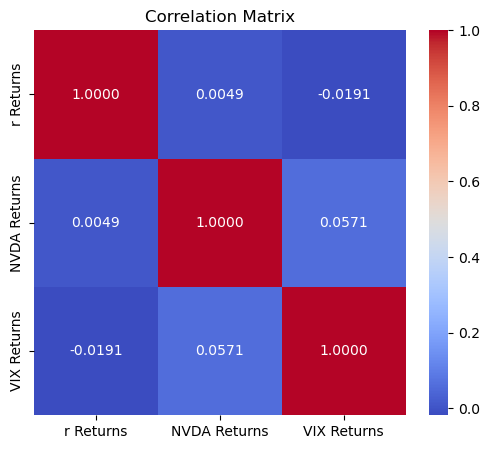

NameError: name 'axes' is not defined

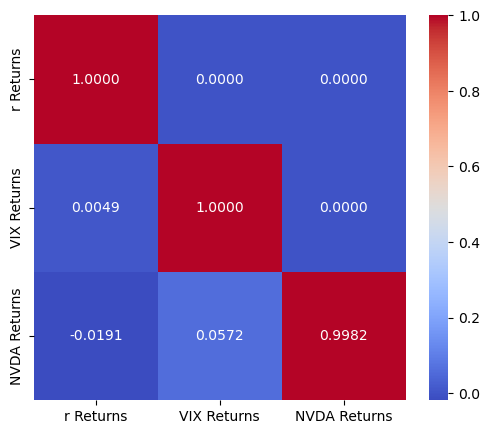

In [26]:
S0  = 118.65
sigma0 =  (IV_Call_lt1 + IV_Put_lt1 + IV_Call_lt2+ IV_Put_lt2 + IV_Call_st1 + IV_Put_st1 + IV_Call_st2 + IV_Put_st2 + IV_Call_st3 + IV_Put_st3 + IV_Barrier_lt1 + IV_Barrier_lt2 + IV_Barrier_st1 + IV_Barrier_st2 + IV_Barrier_st3)/15 # around 0.8
r0 = 0.0522
q = 0
rho_r_NVDA= -0.01910783
rho_Vix_NVDA= 0.05706299
rho_Vix_r= 0.00490937

correlation_matrix = np.array([
    [1, rho_Vix_r, rho_r_NVDA],  # First row
    [rho_Vix_r, 1, rho_Vix_NVDA],     # Second row
    [rho_r_NVDA, rho_Vix_NVDA, 1]    # Third row
])
print("3x3 Correlation Matrix:")
print(correlation_matrix)
cholesky_matrix = np.linalg.cholesky(correlation_matrix)

# Print the Cholesky matrix
print("Cholesky Decomposition Matrix:")
print(cholesky_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', cbar=True, 
            xticklabels=['r Returns', 'NVDA Returns', 'VIX Returns'], 
            yticklabels=['r Returns', 'NVDA Returns', 'VIX Returns'])

plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(cholesky_matrix, annot=True, cmap='coolwarm', fmt='.4f', cbar=True, 
            xticklabels=['r Returns', 'VIX Returns', 'NVDA Returns'], 
            yticklabels=['r Returns', 'VIX Returns', 'NVDA Returns'])
axes[1].set_title('Cholesky Decomposition Matrix')

plt.title('Cholesky Correlation Matrix')
plt.show()

terminal_time_st= 15/252 #22-7 days (7 time horizon)
terminal_time_lt= 65/252 #72-7 days (7 time horizon)

T = 7/252
m = 7 # number of monitoring dates, namely number of steps of the uniform partition of [0,T]
dt = T/m
k_r= 1 # 1/k is the expected number of years to revert back to theta
k_vol=0.5

Nsim = 1000 # number of simulations
r_sim= np.zeros(shape=(Nsim,m+1))
vol_sim= np.zeros(shape=(Nsim,m+1))
S_sim1 = np.zeros(shape=(Nsim,m+1))
S_sim1[:,0]=S0
r_sim[:,0]=r0
vol_sim[:,0]=sigma0
Theta_r = 0.0432 #3 month yield curve expectations
sigma_r= 0.02
Theta_vol = 0.4
vol_vol= 0.7 #medium high range vol_vol for our market case

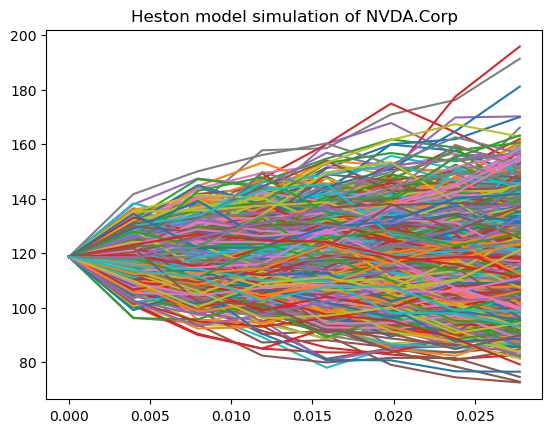

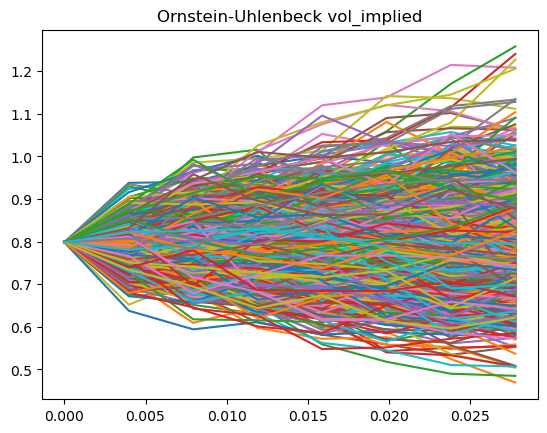

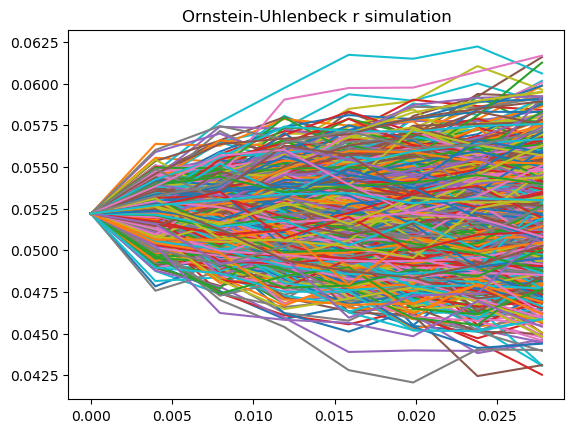

In [27]:
S0  = 118.65
sigma0 =  (IV_Call_lt1 + IV_Put_lt1 + IV_Call_lt2+ IV_Put_lt2 + IV_Call_st1 + IV_Put_st1 + IV_Call_st2 + IV_Put_st2 + IV_Call_st3 + IV_Put_st3 + IV_Barrier_lt1 + IV_Barrier_lt2 + IV_Barrier_st1 + IV_Barrier_st2 + IV_Barrier_st3)/15 # around 0.8
r0 = 0.0522
q = 0
rho_r_NVDA= -0.01910783
rho_Vix_NVDA= 0.05706299
rho_Vix_r= 0.00490937

terminal_time_st= 15/252 #22-7 days (7 time horizon)
terminal_time_lt= 65/252 #72-7 days (7 time horizon)

T = 7/252
m = 7 # number of monitoring dates, namely number of steps of the uniform partition of [0,T]
dt = T/m
k_r= 1 # 1/k is the expected number of years to revert back to theta
k_vol=0.5

Nsim = 1000 # number of simulations
r_sim= np.zeros(shape=(Nsim,m+1))
vol_sim= np.zeros(shape=(Nsim,m+1))
S_sim1 = np.zeros(shape=(Nsim,m+1))
S_sim1[:,0]=S0
r_sim[:,0]=r0
vol_sim[:,0]=sigma0
Theta_r = 0.0432 #3 month yield curve expectations
sigma_r= 0.02
Theta_vol = 0.4
vol_vol= 0.8 #medium high range vol_vol for our market case

for i in range(int(Nsim)):
  for j in range(int(m)):
    r_sim[i,j+1] = r_sim[i,j] +k_r*(Theta_r-r_sim[i,j])*dt +sigma_r*np.sqrt(dt)*np.random.normal(0,1)
    vol_sim[i,j+1] = np.abs(vol_sim[i,j] + k_vol*(Theta_vol-vol_sim[i,j])*dt + vol_vol*np.sqrt(vol_sim[i,j]*dt)*(np.random.normal(0,1)*0.00490937 +np.random.normal(0,1)*0.99998795))
    S_sim1[i,j+1]= S_sim1[i,j] + r_sim[i,j]*S_sim1[i,j]*dt + S_sim1[i,j]*np.sqrt(vol_sim[i,j]*dt)*(-0.01910783*np.random.normal(0,1) + 0.05715749* np.random.normal(0,1) + 0.9981823* np.random.normal(0,1) )
ts1 = np.linspace(0,T,m+1)
for i in range(int(Nsim)):
  plt.plot(ts1,S_sim1[i,:])

plt.title('Heston model simulation of NVDA.Corp')
plt.show()

for i in range(int(Nsim)):
  plt.plot(ts1,vol_sim[i,:])

plt.title('Ornstein-Uhlenbeck vol_implied')
plt.show()

for i in range(int(Nsim)):
  plt.plot(ts1,r_sim[i,:])

plt.title('Ornstein-Uhlenbeck r simulation')
plt.show()


MonteCarlo simulation 


In [45]:
Final_barrier_prices_lt1_Greeks = np.zeros(shape=Nsim)
Final_barrier_prices_lt2_Greeks = np.zeros(shape=Nsim)
Final_barrier_prices_st1_Greeks = np.zeros(shape=Nsim)
Final_barrier_prices_st2_Greeks = np.zeros(shape=Nsim)
Final_barrier_prices_st3_Greeks = np.zeros(shape=Nsim)

Final_Strangles_prices_lt1_Greeks = np.zeros(shape=Nsim)
Final_Strangles_prices_lt2_Greeks = np.zeros(shape=Nsim)
Final_Strangles_prices_st1_Greeks = np.zeros(shape=Nsim)
Final_Strangles_prices_st2_Greeks = np.zeros(shape=Nsim)
Final_Strangles_prices_st3_Greeks = np.zeros(shape=Nsim)

Final_Strip_prices_st_Greeks= np.zeros(shape=Nsim)

Final_Digital_prices_st1_Greeks= np.zeros(shape=Nsim)
Final_Digital_prices_st2_Greeks= np.zeros(shape=Nsim)
Final_Digital_prices_st3_Greeks= np.zeros(shape=Nsim)
Final_Digital_prices_st4_Greeks= np.zeros(shape=Nsim)

for i in range(int(Nsim)):
        Final_barrier_prices_lt1_Greeks[i]= callBarrierDownIn(118.65, K_Call_bar_lt1, IV_Barrier_lt1+ vol_sim[i,-1]*1.01-0.8, r_sim[i, -1], terminal_time_lt, q, H_lt1, B_lt1)
        Final_barrier_prices_lt2_Greeks[i]= callBarrierDownIn(118.65, K_Call_bar_lt2, IV_Barrier_lt2+ vol_sim[i,-1]*1.01-0.8, r_sim[i, -1], terminal_time_lt, q, H_lt2, B_lt2)
        Final_barrier_prices_st1_Greeks[i]= callBarrierDownIn(118.65, K_Call_bar_st1, IV_Barrier_st1+ vol_sim[i,-1]*1.01-0.8, r_sim[i, -1], terminal_time_st, q, H_st1, B_st1)
        Final_barrier_prices_st2_Greeks[i]= callBarrierDownIn(118.65, K_Call_bar_st2, IV_Barrier_st2+ vol_sim[i,-1]*1.01-0.8, r_sim[i, -1], terminal_time_st, q, H_st2, B_st2)
        Final_barrier_prices_st3_Greeks[i]= callBarrierDownIn(118.65, K_Call_bar_st3, IV_Barrier_st3+ vol_sim[i,-1]*1.01-0.8, r_sim[i, -1], terminal_time_st, q, H_st3, B_st3)



        Final_Strangles_prices_lt1_Greeks[i]= Strangle(118.65, terminal_time_lt, K_call_lt1, r_sim[i, -1], q, IVCall_lt1 + vol_sim[i,-1]*1.01-0.8,IVPut_lt1 + vol_sim[i,-1]*1.01-0.8, K_put_lt1)
        Final_Strangles_prices_lt2_Greeks[i]= Strangle(118.65, terminal_time_lt, K_call_lt2, r_sim[i, -1], q, IVCall_lt2 + vol_sim[i,-1]*1.01-0.8,IVPut_lt2 + vol_sim[i,-1]*1.01-0.8, K_put_lt2)
        Final_Strangles_prices_st1_Greeks[i]= Strangle(118.65, terminal_time_st, K_Call_st1, r_sim[i, -1], q, IVCall_st1 + vol_sim[i,-1]*1.01-0.8,IVPut_st1 + vol_sim[i,-1]*1.01-0.8, K_Put_st1)
        Final_Strangles_prices_st2_Greeks[i]= Strangle(118.65, terminal_time_st, K_Call_st2, r_sim[i, -1], q, IVCall_st2 + vol_sim[i,-1]*1.01-0.8,IVPut_st2 + vol_sim[i,-1]*1.01-0.8, K_Put_st2)
        Final_Strangles_prices_st3_Greeks[i]= Strangle(118.65, terminal_time_st, K_Call_st3, r_sim[i, -1], q, IVCall_st3 + vol_sim[i,-1]*1.01-0.8,IVPut_st3 + vol_sim[i,-1]*1.01-0.8, K_Put_st3)
        
        Final_Strip_prices_st_Greeks[i]= LongStripCall(S_sim1[i,-1], terminal_time_st, K_Call_st1,K_Call_st2, K_Call_st3, K_Call_st4,  r_sim[i, -1], q, IV_Call_st1 + vol_sim[i,-1]*1.01-0.8, IV_Call_st2 + vol_sim[i,-1]*1.01-0.8, IV_Call_st3 + vol_sim[i,-1]*1.01-0.8, IV_Call_st4 + vol_sim[i,-1]*1.01-0.8)
        
        Final_Digital_prices_st1_Greeks[i]= Knock_In_Digital_Put(118.65, T, K_Put_digit_st1, r_sim[i, -1], IV_Digital_st1 + vol_sim[i,-1]*1.01-0.8, B_Digit_st1, Q )
        Final_Digital_prices_st2_Greeks[i]= Knock_In_Digital_Put(118.65, T, K_Put_digit_st2, r_sim[i, -1], IV_Digital_st2 + vol_sim[i,-1]*1.01-0.8, B_Digit_st2, Q )
        Final_Digital_prices_st3_Greeks[i]= Knock_In_Digital_Put(118.65, T, K_Put_digit_st3, r_sim[i, -1], IV_Digital_st3 + vol_sim[i,-1]*1.01-0.8, B_Digit_st3, Q )
        Final_Digital_prices_st4_Greeks[i]= Knock_In_Digital_Put(118.65, T, K_Put_digit_st4, r_sim[i, -1], IV_Digital_st4 + vol_sim[i,-1]*1.01-0.8, B_Digit_st4, Q )



Final_portfolio_Value_T1=np.zeros(shape=(Nsim))
Total_Short_Position=np.zeros(shape=(Nsim))
Total_Long_Position=np.zeros(shape=(Nsim))

for i in range(Nsim):
    Final_portfolio_Value_T1[i] = - Final_barrier_prices_lt1_Greeks[i]*1 - Final_barrier_prices_lt2_Greeks[i]*1 - Final_barrier_prices_st1_Greeks[i]*1 -Final_barrier_prices_st2_Greeks[i]*1 - Final_barrier_prices_st3_Greeks[i]*1 + Final_Strangles_prices_lt1_Greeks[i]*1 + Final_Strangles_prices_lt2_Greeks[i]*1 + Final_Strangles_prices_st1_Greeks[i]*1 + Final_Strangles_prices_st2_Greeks[i]*1 + Final_Strangles_prices_st3_Greeks[i]*1+ Final_Strip_prices_st_Greeks[i] - Final_Digital_prices_st1_Greeks[i]*1-Final_Digital_prices_st2_Greeks[i]*1 -Final_Digital_prices_st3_Greeks[i]*1 -Final_Digital_prices_st4_Greeks[i]*1 +0*S_sim1[i, -1]
    Total_Short_Position[i] = (-Final_barrier_prices_lt1_Greeks[i]
                        - Final_barrier_prices_lt2_Greeks[i]
                        - Final_barrier_prices_st1_Greeks[i]
                        - Final_barrier_prices_st2_Greeks[i]
                        - Final_barrier_prices_st3_Greeks[i]
                        - Final_Digital_prices_st1_Greeks[i]
                        - Final_Digital_prices_st2_Greeks[i]
                        - Final_Digital_prices_st3_Greeks[i]
                        - Final_Digital_prices_st4_Greeks)[i]
    Total_Long_Position[i] = (Final_Strangles_prices_lt1_Greeks[i]
                      + Final_Strangles_prices_lt2_Greeks[i]
                      + Final_Strangles_prices_st1_Greeks[i]
                      + Final_Strangles_prices_st2_Greeks[i]
                      + Final_Strangles_prices_st3_Greeks[i]
                      + Final_Strip_prices_st_Greeks[i])

ProfitLoss=np.zeros(shape=(Nsim))
ProfitLoss_short=np.zeros(shape=(Nsim))
ProfitLoss_long=np.zeros(shape=(Nsim))
for i in range(int(Nsim)):
    ProfitLoss[i]=(Final_portfolio_Value_T1[i]+cost0)*100
    ProfitLoss_short[i]=(Total_Short_Position[i]+cost_Short_Position)*100
    ProfitLoss_long[i]=(Total_Long_Position[i]+cost_Long_Position)*100

print(np.mean(ProfitLoss))
print(np.mean(ProfitLoss_short))
print(np.mean(ProfitLoss_long))



325.4050059893199
1864.7116223832606
-1539.3066163939404


P&L

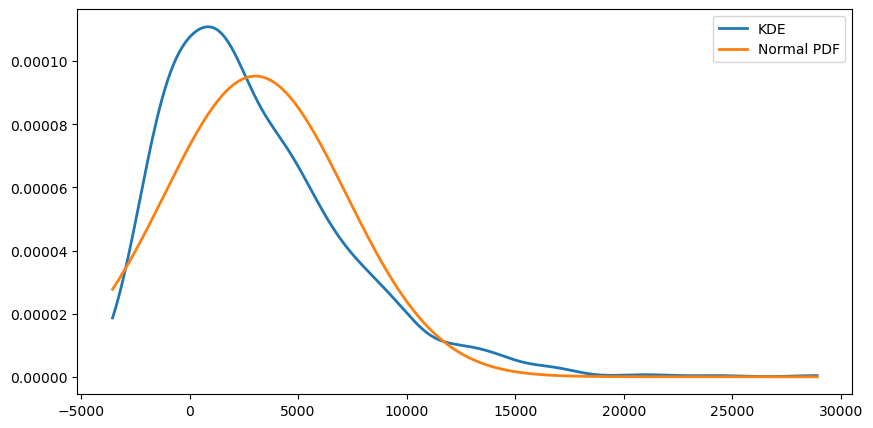

In [29]:
#PDF Plot
ProfitLoss_max=np.max(ProfitLoss)
ProfitLoss_min=np.min(ProfitLoss)
deltas= np.linspace(ProfitLoss_min,ProfitLoss_max,Nsim)
sigma_hat = ProfitLoss.std()
mu_hat = ProfitLoss.mean()

from scipy.stats import gaussian_kde
kde = gaussian_kde(ProfitLoss)
kde_vals = kde(deltas)

Deltastep= (ProfitLoss_max-ProfitLoss_min)/Nsim
error= Deltastep/2
PDF_hat =np.zeros(shape=Nsim)
PDF_norm =np.zeros(shape=Nsim)
for i in range(int(Nsim)):
    #PDF_hat[i] = ((sum( ProfitLoss <= deltas[i]+error)/Nsim) - (sum( ProfitLoss<= deltas[i]-error)/Nsim) )/(2*error)
    PDF_norm[i]= norm.pdf( deltas[i], mu_hat, sigma_hat)

plt.figure(figsize=(10, 5))
#plt.plot(deltas, PDF_hat, linewidth=2, label='Empirical PDF')
plt.plot(deltas, kde_vals, linewidth = 2, label = 'KDE')
plt.plot(deltas, PDF_norm, linewidth=2, label='Normal PDF')
plt.legend()
plt.show()

PDF plot against Normal distribution


In [30]:
Var=np.percentile(ProfitLoss, 5)
print('5 days Value at Risk5%:',Var)

5 days Value at Risk5%: -1999.0326064223284


VaR